<a href="https://colab.research.google.com/github/dfebriyanto/police/blob/main/police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('police.csv')
data.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [21]:
data.describe()

,county_name
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [22]:
data.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [23]:
data["stop_datetime"] = pd.to_datetime(data["stop_date"] + " " + data["stop_time"])
data["stop_datetime"]

0       2005-01-04 12:55:00
1       2005-01-23 23:15:00
2       2005-02-17 04:15:00
3       2005-02-20 17:15:00
4       2005-02-24 01:20:00
                ...        
91736   2015-12-31 21:21:00
91737   2015-12-31 21:59:00
91738   2015-12-31 22:04:00
91739   2015-12-31 22:09:00
91740   2015-12-31 22:47:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [24]:
data = data.set_index("stop_datetime")
data.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [25]:
data["hour"] = data["stop_time"].str.split(":", expand=True)[0]
data["hour"]

stop_datetime
2005-01-04 12:55:00    12
2005-01-23 23:15:00    23
2005-02-17 04:15:00    04
2005-02-20 17:15:00    17
2005-02-24 01:20:00    01
                       ..
2015-12-31 21:21:00    21
2015-12-31 21:59:00    21
2015-12-31 22:04:00    22
2015-12-31 22:09:00    22
2015-12-31 22:47:00    22
Name: hour, Length: 91741, dtype: object

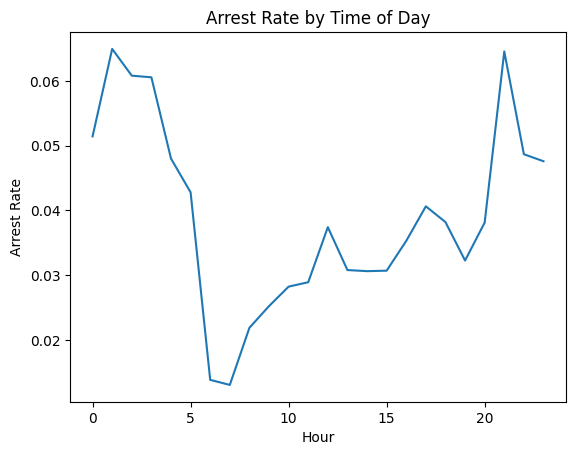

In [37]:
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

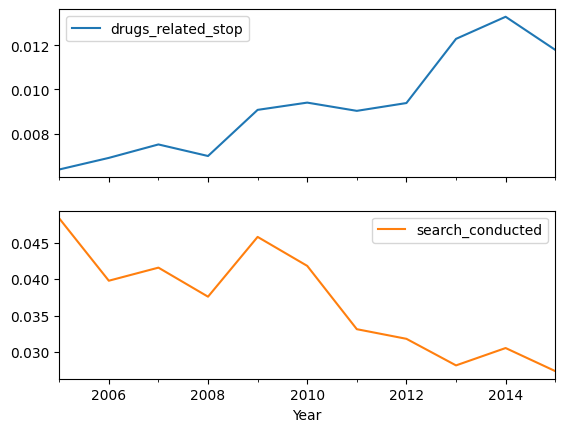

In [32]:
annual_trend = data.resample('A')[['drugs_related_stop','search_conducted']].mean()
annual_trend.plot(subplots=True)
plt.xlabel("Year")
plt.show()

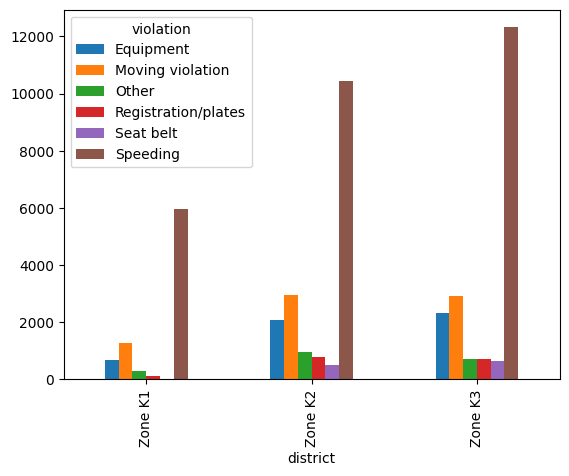

In [38]:
k_zones.plot(kind='bar')
plt.show()

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

array([ 8., 23., nan, 45.])

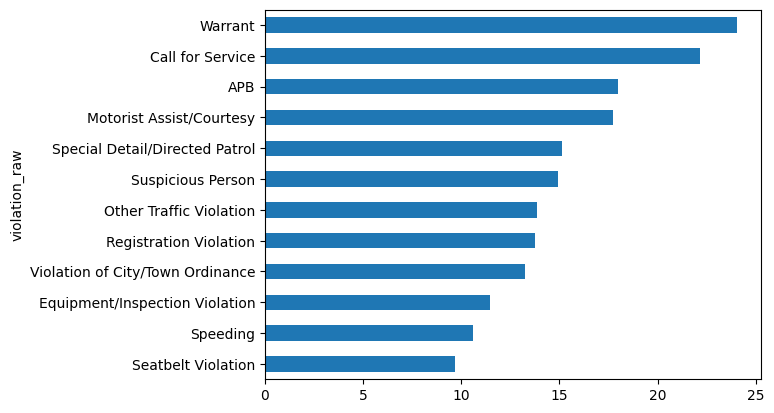

In [36]:
display(data.stop_duration.unique())
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
data['stop_minutes'] = data.stop_duration.map(mapping)
display(data['stop_minutes'].unique())
stop_length = data.groupby('violation_raw')['stop_minutes'].mean()
stop_length.sort_values().plot(kind='barh')
plt.show()